In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/AgriWise/ML/crop-recommendation/Crop_recommendation1.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [ ]:
data.shape

(2200, 8)

In [ ]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
print("Number of classes = ", len(data['label'].unique()))


Number of classes =  22


In [ ]:
print("crops name: ", data['label'].unique())

crops name:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
crop_mean_value = pd.pivot_table(data,index=['label'],aggfunc='mean')
crop_mean_value.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [ ]:
colorarray = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [ ]:
def Element_analysis (values,code,name):
  fig = make_subplots(rows=1, cols=2)

  top = {
      'y' : values[code][0:10].sort_values().index,
      'x' : values[code][0:10].sort_values()
  }

  last = {
      'y' : values[code][-10:].index,
      'x' : values[code][-10:]
  }

  fig.add_trace(
      go.Bar(top,
            name="Most "+name+" required",
            marker_color=random.choice(colorarray),
            orientation='h',
            text=top['x']),
      
      row=1, col=1
  )

  fig.add_trace(
      go.Bar(last,
            name="Least "+name+" required",
            marker_color=random.choice(colorarray),
            orientation='h',
            text=last['x']),
      row=1, col=2
  )
  fig.update_traces(texttemplate='%{text}', textposition='inside')
  fig.update_layout(title_text=name,
                    plot_bgcolor='white',
                    font_size=12, 
                    font_color='black',
                  height=500)

  fig.update_xaxes(showgrid=False)
  fig.update_yaxes(showgrid=False)
  fig.show()




Nitrogen Analysis


In [ ]:

Nitrogen = crop_mean_value.sort_values(by='N', ascending=False)
Element_analysis(Nitrogen,'N',"Nitrogen")



Phosphorus Analysis


In [ ]:
Phosphorus=crop_mean_value.sort_values(by='P', ascending=False)
Element_analysis(Phosphorus,'P',"Phosphorus")


Potassium analysis


In [ ]:
Potassium=crop_mean_value.sort_values(by='K', ascending=False)
Element_analysis(Potassium,'K',"Potassium")


ratio of element for some crops

In [ ]:
def Element_ratio(name):
  labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
  fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                              {'type':'domain'}, {'type':'domain'}, 
                                              {'type':'domain'}]])

  element_npk = crop_mean_value[crop_mean_value.index==name]
  values = [element_npk['N'][0], element_npk['P'][0], element_npk['K'][0]]
  fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 1)
  fig.show()

In [ ]:
Element_ratio('apple')

In [ ]:
Element_ratio('cotton')

In [ ]:
Element_ratio('rice')

In [ ]:
Element_ratio('orange')

Comparision between rainfall, temerature and humidity

In [ ]:
fig = px.bar(crop_mean_value, x=crop_mean_value.index, y=["rainfall", "temperature", "humidity"])
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

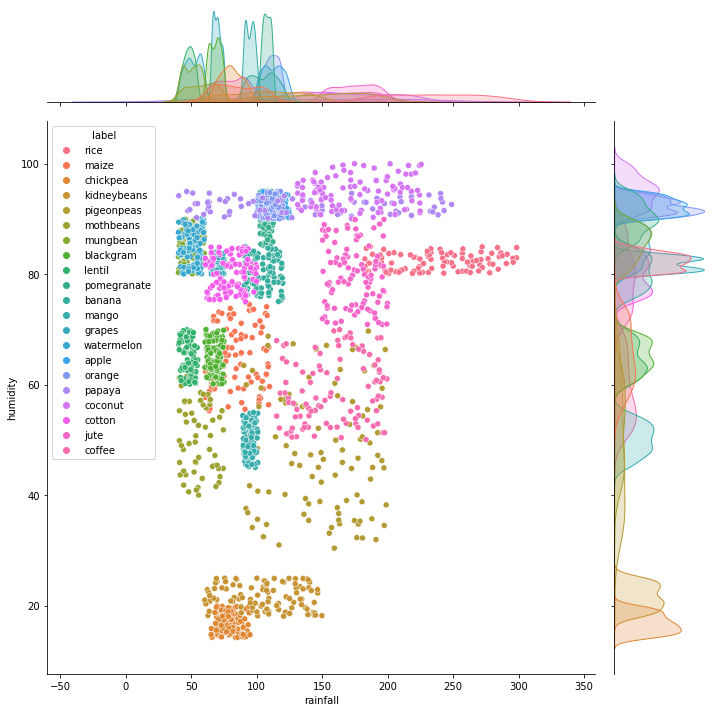

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=data[(data['temperature']<40) & 
                                                  (data['rainfall']>40)],height=10,hue="label")

Correlation between features

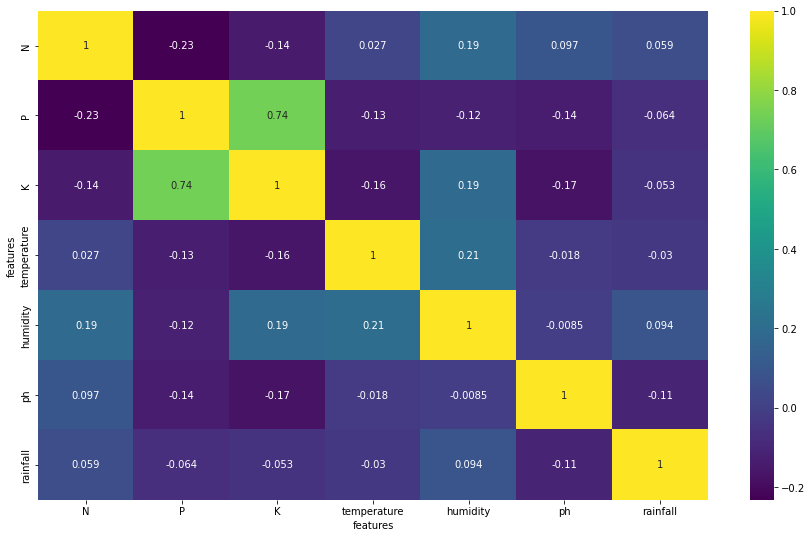

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(data.corr(), annot=True,cmap='viridis' )
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.show()

In [ ]:
features=data.drop('label', axis=1)
y=data['label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

Split dataset into train and test 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2,
                                                    shuffle = True, random_state = 42)
acc=[]
model=[]

DecisionTree

In [ ]:
DT = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=5)

DT.fit(X_train,y_train)

predicted_values = DT.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(metrics.classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  86.5909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.61      1.00      0.75        20
    chickpea       1.00      0.96      0.98        26
     coconut       0.96      0.96      0.96        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.63      0.96      0.76        23
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.42      1.00      0.59        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
score = cross_val_score(DT, features, y,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.93636364 0.91136364 0.92045455 0.87272727 0.93636364]


In [ ]:
dt_train_accuracy = DT.score(X_train,y_train)
print("Training accuracy = ",dt_train_accuracy)
dt_test_accuracy = DT.score(X_test,y_test)
print("Testing accuracy = ",dt_test_accuracy)

Training accuracy =  0.8875
Testing accuracy =  0.865909090909091


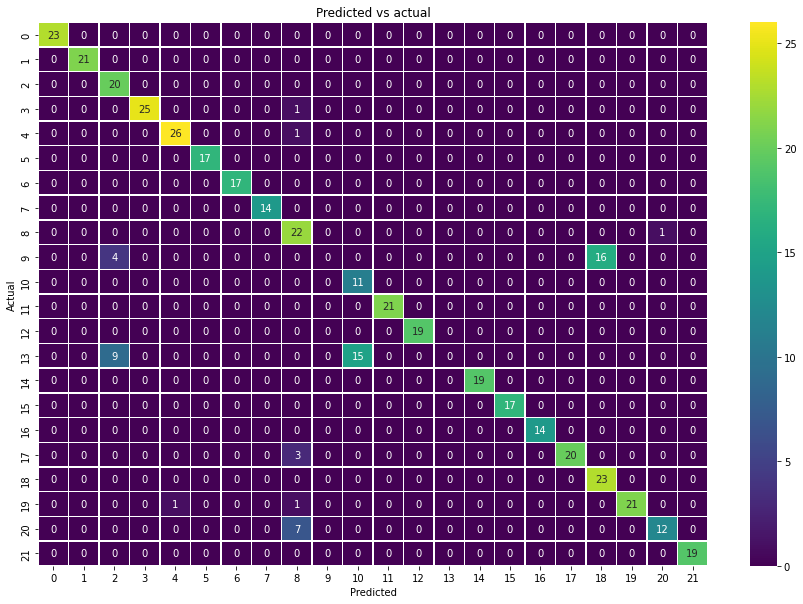

In [ ]:
y_pred = DT.predict(X_test)
y_true = y_test
cm_dt = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)
predicted_values = RF.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(metrics.classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

In [ ]:
score = cross_val_score(RF,features,y,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]


In [ ]:
rf_train_accuracy = RF.score(X_train,y_train)
print("Training accuracy = ",rf_train_accuracy)
rf_test_accuracy = RF.score(X_test,y_test)
print("Testing accuracy = ",rf_test_accuracy)

Training accuracy =  1.0
Testing accuracy =  0.9931818181818182


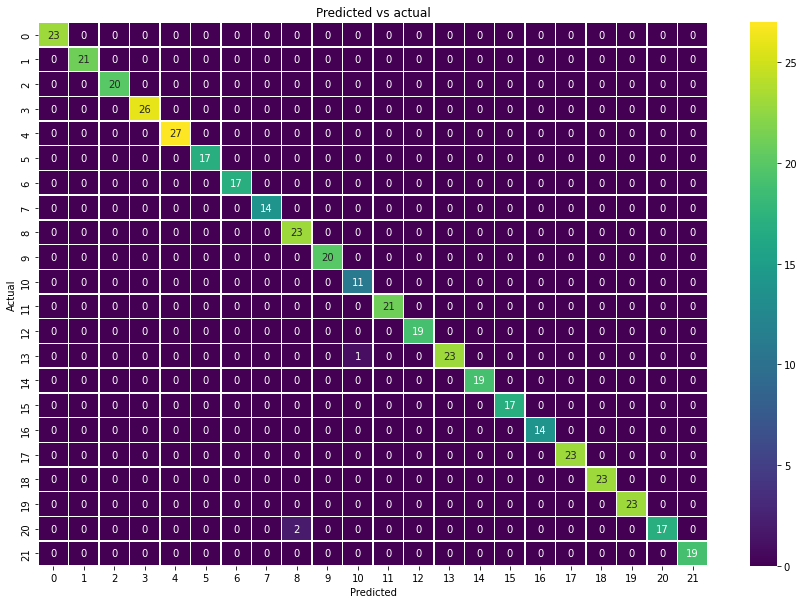

In [ ]:
y_pred = RF.predict(X_test)
y_true = y_test
cm_rf = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()


NaiveBayes

In [ ]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)
predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x)
print(metrics.classification_report(y_test,predicted_values))

Naive Bayes Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00   

In [ ]:
score = cross_val_score(NaiveBayes,features,y,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


In [ ]:
nv_train_accuracy = NaiveBayes.score(X_train,y_train)
print("Training accuracy = ",nv_train_accuracy)
nv_test_accuracy = NaiveBayes.score(X_test,y_test)
print("Testing accuracy = ",nv_test_accuracy)

Training accuracy =  0.9948863636363636
Testing accuracy =  0.9954545454545455


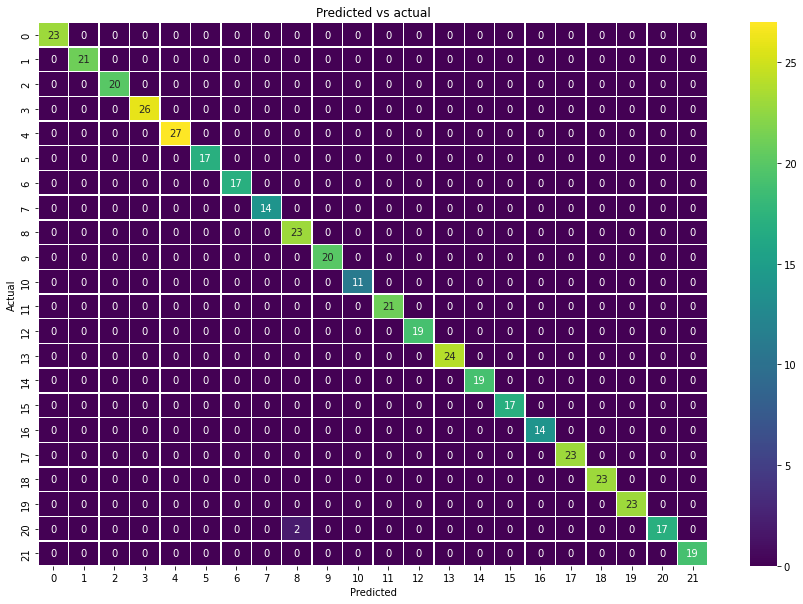

In [ ]:
y_pred = NaiveBayes.predict(X_test)
y_true = y_test
cm_rf = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

SVM

In [ ]:
SVM = SVC(gamma='auto')
SVM.fit(X_train,y_train)
predicted_values = SVM.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)
print(metrics.classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.09090909090909091
              precision    recall  f1-score   support

       apple       1.00      0.13      0.23        23
      banana       1.00      0.05      0.09        21
   blackgram       1.00      0.05      0.10        20
    chickpea       0.00      0.00      0.00        26
     coconut       1.00      0.07      0.14        27
      coffee       1.00      0.06      0.11        17
      cotton       1.00      0.18      0.30        17
      grapes       1.00      0.07      0.13        14
        jute       1.00      0.04      0.08        23
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.03      1.00      0.05        11
       maize       0.00      0.00      0.00        21
       mango       1.00      0.11      0.19        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       1.00      0.11      0.19        19
   muskmelon       1.00      0.59      0.74        17
      orange       0.00      0.00      0.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
score = cross_val_score(SVM,features,y,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.27727273 0.28863636 0.29090909 0.275      0.26818182]


In [ ]:
svm_train_accuracy =SVM.score(X_train,y_train)
print("Training accuracy = ",svm_train_accuracy)
svm_test_accuracy = SVM.score(X_test,y_test)
print("Testing accuracy = ",svm_test_accuracy)

Training accuracy =  1.0
Testing accuracy =  0.09090909090909091


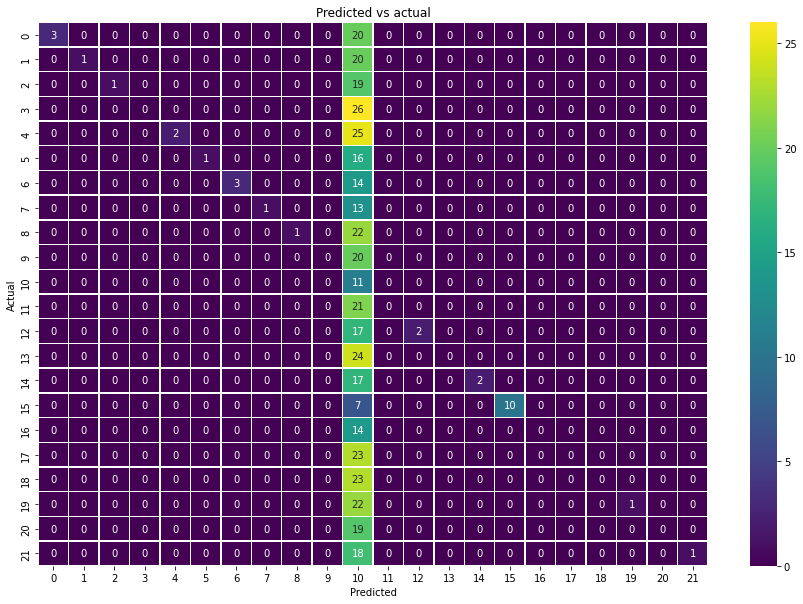

In [ ]:
y_pred = SVM.predict(X_test)
y_true = y_test
cm_rf = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

Logistic Regression

In [ ]:
LogReg = LogisticRegression(random_state=2)
LogReg.fit(X_train,y_train)
predicted_values = LogReg.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)
print(metrics.classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.9454545454545454
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.83      0.75      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.76      0.84        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.85      0.92      0.88        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00   

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
log_train_accuracy =LogReg.score(X_train,y_train)
print("Training accuracy = ",log_train_accuracy)
log_test_accuracy = LogReg.score(X_test,y_test)
print("Testing accuracy = ",svm_test_accuracy)

Training accuracy =  0.9761363636363637
Testing accuracy =  0.09090909090909091


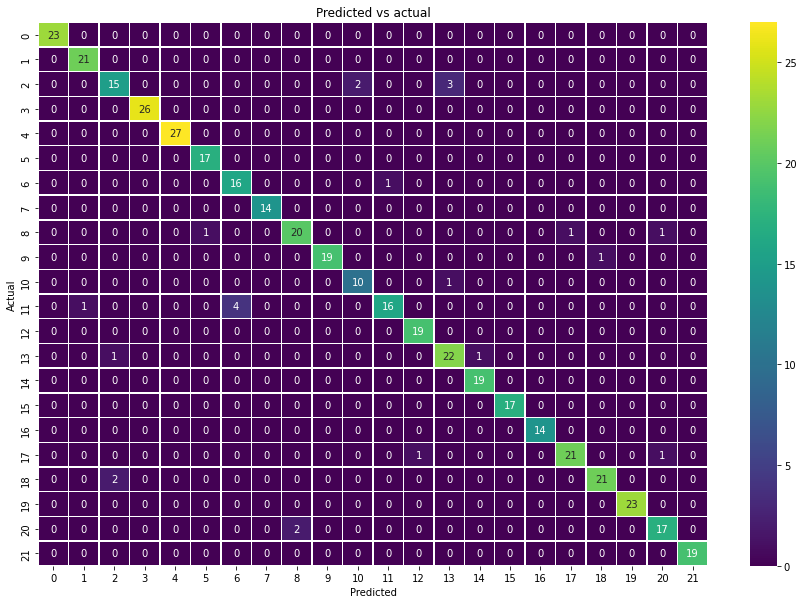

In [ ]:
y_pred = LogReg.predict(X_test)
y_true = y_test
cm_rf = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

Accuracy comparison

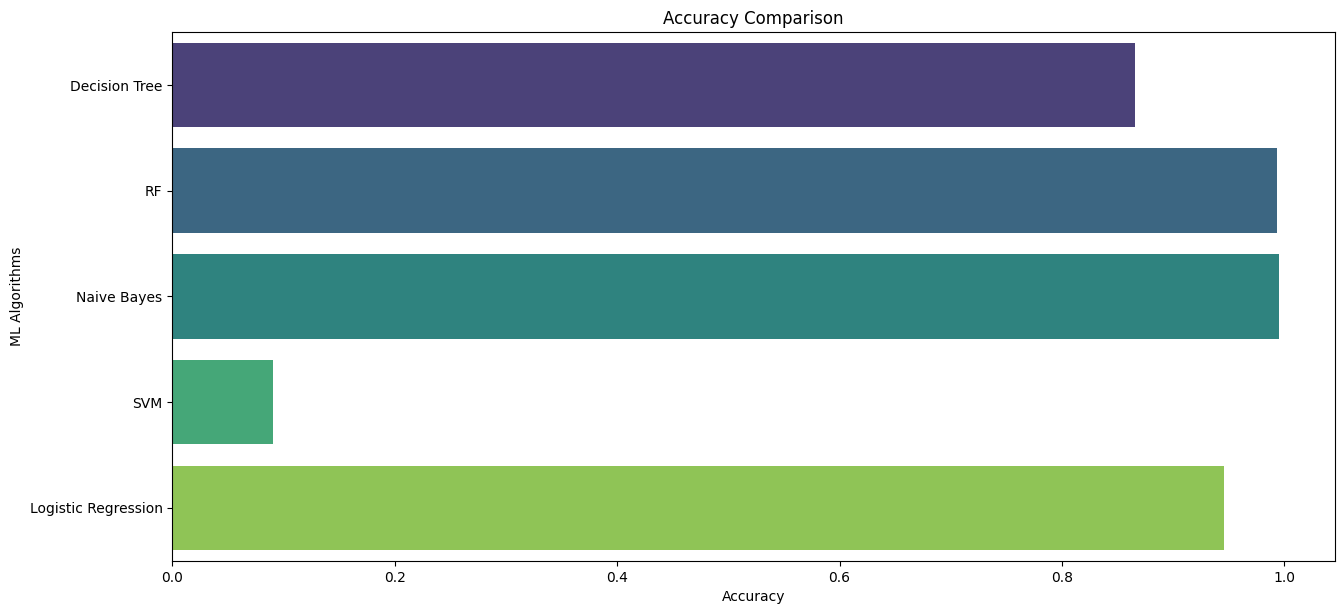

In [ ]:
plt.figure(figsize=[15,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

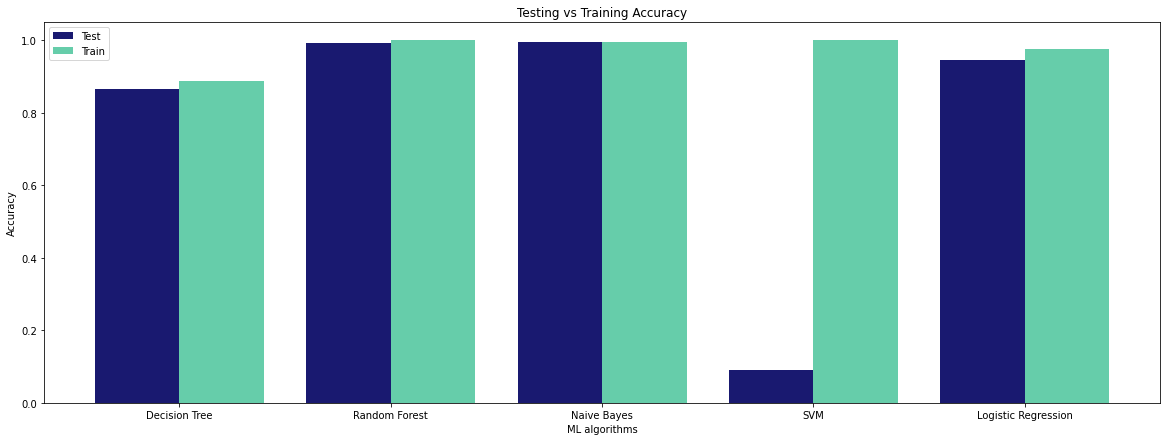

In [ ]:
label = ['Decision Tree','Random Forest','Naive Bayes','SVM','Logistic Regression']
Test = [dt_test_accuracy,rf_test_accuracy,
        nv_test_accuracy,svm_test_accuracy,log_test_accuracy]
Train = [ dt_train_accuracy, rf_train_accuracy,
         nv_train_accuracy,svm_train_accuracy,log_train_accuracy]
f, ax = plt.subplots(figsize=(20,7)) 
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))
plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
plt.show()

In [ ]:
new=RF.predict([[90, 42, 43, 20.879744, 75, 5.5,220]])
new

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array(['rice'], dtype=object)

array(['jute'], dtype='<U11')